<a href="https://colab.research.google.com/github/chandrasekhark/PythonforDataScience/blob/main/Real_Time_Face_Mask_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifying Real-Time Face Mask Detector using CNN on Tensorflow 2.x**

## Problem Statement

India has been fighting the COVID-19 pandemic since30 January 2020 when the first case of COVID-19 wasreported. With the Unlock 4.0 phase set to begin inSeptember, the need to be proactive is now more thanever. The objective is to create a Real-Time Face MaskDetector which can solve monitoring issues in crowdedareas  such  as  Airports,  Metros,  etc.  using  CNN  andOpenCV

####**Dataset Description**

The dataset is an artificial set of face mask [images](https://drive.google.com/open?id=1EKZVZlK5YtMnXWYE6YGHG_XtJt_7avk0)

•Total Images: 1376

•with_mask images: 

•without_mask images: 

The goal is to create a Deep Learning model to detect in real-time whether a person is wearing a face mask or not

####**Aim of the Project**

The dataset consists of 1376 images consisting of two classes–with_mask and without_mask. The objective to create a Face Mask Detector using CNN and OpenCV.

####**Tasks to be Performed**

As a part of this test, you will be performing the following tasks:

•Prepare a detailed python notebook using CNNfor detecting Face Masks in Real-time

•Import Required Libraries

•Load and Pre-process the dataset

•Visualize the dataset

•Designa Convolutional Neural Network (CNN) Model

•Compile the Model

•Train the Model

•Evaluate the Model 

•Detect the Face Masks using the HaarCascade_frontalface_default.xml file in real time

[Required Files](https://drive.google.com/open?id=1cB1Eai6UxqmqbONCT99hpoPAGRgvzxpp)

# Solution:Real-Time Face Mask Detector using CNN on Tensorflow 2.x

##Pre-process  the Dataset

#### <b> Load the  Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### <b> Visualize the  Data

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


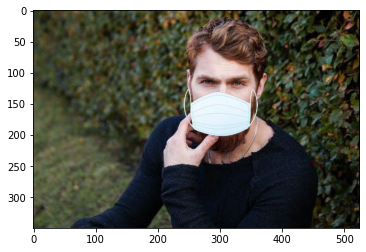

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/dataset/with_mask/0-with-mask.jpg')
imgplot = plt.imshow(img)
plt.show()

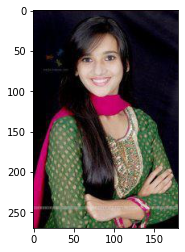

In [ ]:
img=mpimg.imread('/content/drive/MyDrive/dataset/without_mask/0.jpg')
imgplot = plt.imshow(img)
plt.show()

##  Import Libraries

In [ ]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

## Designing the Model

#### <b> Initialize the parameters

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

base_dir = '/content/drive/MyDrive/dataset'
splitfolders.ratio(base_dir, output='split', seed=42, ratio=(.7,.2,.1), group_prefix=None)
splitfolders.fixed(base_dir, output='split', seed=42, fixed=(100, 100), oversample=False, group_prefix=None)

Copying files: 1376 files [00:06, 204.61 files/s]
Copying files: 1376 files [00:06, 217.41 files/s]


In [ ]:
totalFiles = 0
totalDir = 0

path="/content/drive/MyDrive/dataset"

for base, dirs, files in os.walk(path):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1


print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)
print('Total:',(totalDir + totalFiles))

nb_total_sample = totalFiles

Searching in :  /content/drive/MyDrive/dataset
Searching in :  /content/drive/MyDrive/dataset/with_mask
Searching in :  /content/drive/MyDrive/dataset/without_mask
Total number of files 1376
Total Number of directories 2
Total: 1378


In [ ]:
totalFiles = 0
totalDir = 0

path="/content/split/train"

for base, dirs, files in os.walk(path):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1


print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)
print('Total:',(totalDir + totalFiles))

nb_train_sample = totalFiles

Searching in :  /content/split/train
Searching in :  /content/split/train/with_mask
Searching in :  /content/split/train/without_mask
Total number of files 976
Total Number of directories 2
Total: 978


In [ ]:
totalFiles = 0
totalDir = 0

path="/content/split/val"

for base, dirs, files in os.walk(path):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1


print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)
print('Total:',(totalDir + totalFiles))

nb_validation_samples = totalFiles

Searching in :  /content/split/val
Searching in :  /content/split/val/with_mask
Searching in :  /content/split/val/without_mask
Total number of files 275
Total Number of directories 2
Total: 277


In [ ]:
totalFiles = 0
totalDir = 0

path="/content/split/test"

for base, dirs, files in os.walk(path):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1


print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)
print('Total:',(totalDir + totalFiles))

nb_test_samples = totalFiles

Searching in :  /content/split/test
Searching in :  /content/split/test/with_mask
Searching in :  /content/split/test/without_mask
Total number of files 200
Total Number of directories 2
Total: 202


In [ ]:
img_width, img_height = 150,150  #width and height of the images

train_data_dir = r"/content/split/train"
validation_data_dir=r"/content/split/val"

#Total Dataset: 10000 images
#Training Dataset: 8000 images
#Validation/Test Dataset: 2000 images

nb_train_sample =100
nb_validation_samples =100
batch_size= 20
nb_train_sample=int(nb_train_sample/batch_size)
nb_validation_samples = int(nb_validation_samples/batch_size)
epochs =13


#### <b> Check the shape of the image

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

#### <b> Generate Images to train the model

In [ ]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)

test_datagen=ImageDataGenerator (rescale=1. /255)

train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['with_mask','without_mask'])

validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')

Found 976 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


####**Visual Representation of ImageDataGenerator**

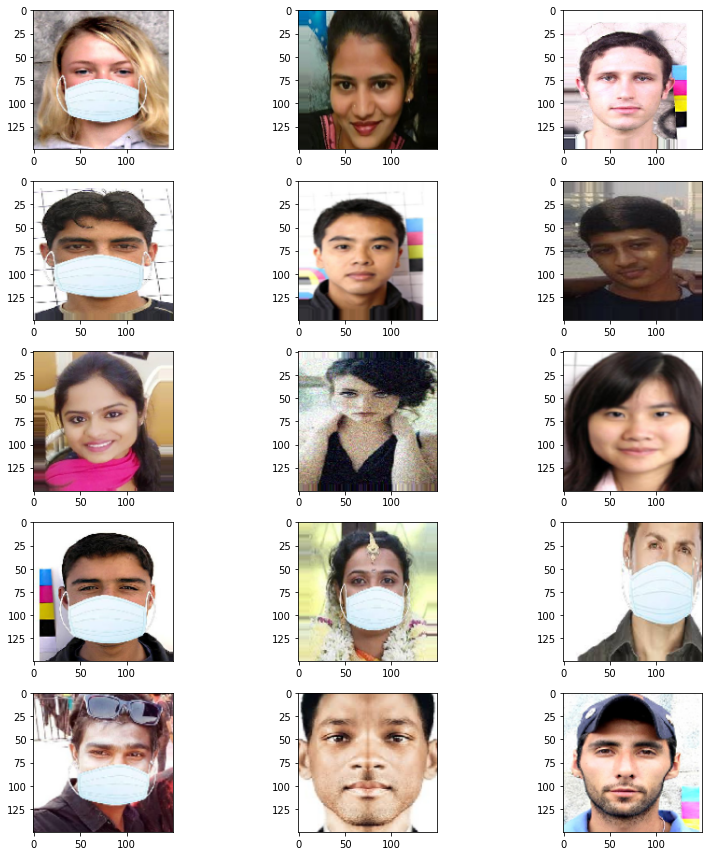

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### <b> Build the basic CNN model 0

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter
#This class allows to create convolutional neural network to extract feature from the images

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling2D helps to reduce the size of the data

model.add(Flatten())#Converts multi dimensional array to 1D channel
model.add(Dense(64)) #64 neurons with 3*3 filter 
#Numbers of output nodes in the hidden layer
model.add(Activation('relu'))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid')) #sigmoid activation function
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_9 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 350464)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                22429760  
                                                                 
 activation_10 (Activation)  (None, 64)                0         
                                                      

#### <b> Compile the basic CNN model 

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_9 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 350464)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                22429760  
                                                                 
 activation_10 (Activation)  (None, 64)                0         
                                                      

#### <b> Fit the basic CNN model 

In [ ]:
training = model.fit_generator(train_generator,
                   epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/13
49/49 [==============================] - 37s 733ms/step - loss: 3.5240 - accuracy: 0.7367 - val_loss: 1.5818 - val_accuracy: 0.5200
Epoch 2/13
49/49 [==============================] - 36s 737ms/step - loss: 0.2645 - accuracy: 0.9037 - val_loss: 0.2187 - val_accuracy: 0.9200
Epoch 3/13
49/49 [==============================] - 36s 729ms/step - loss: 0.2464 - accuracy: 0.9262 - val_loss: 0.0685 - val_accuracy: 0.9700
Epoch 4/13
49/49 [==============================] - 36s 727ms/step - loss: 0.1809 - accuracy: 0.9447 - val_loss: 0.0844 - val_accuracy: 0.9500
Epoch 5/13
49/49 [==============================] - 35s 718ms/step - loss: 0.1521 - accuracy: 0.9549 - val_loss: 0.0718 - val_accuracy: 0.9900
Epoch 6/13
49/49 [==============================] - 35s 718ms/step - loss: 0.1363 - accuracy: 0.9559 - val_loss: 5.0344 - val_accuracy: 0.5400
Epoch 7/13
49/49 [==============================] - 36s 724ms/step - loss: 0.1843 - accuracy: 0.9693 - val_loss: 0.2043 - val_accuracy: 0.9200

#### <b> Find the accuracy score

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


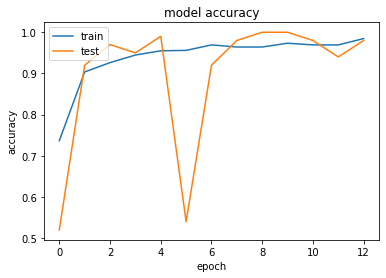

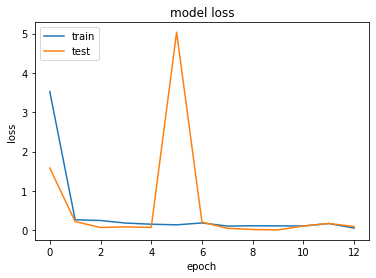

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image

[[0.]]
Prediction:  With Mask


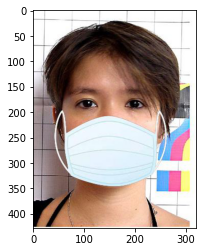

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/split/test/with_mask/121-with-mask.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Without Mask"
else:
    prediction ="With Mask"
print('Prediction: ',prediction)

img=mpimg.imread('/content/split/test/with_mask/121-with-mask.jpg')
imgplot = plt.imshow(img)
plt.show()


#### <b> Predict the image

[[1.]]
Prediction:  Without Mask


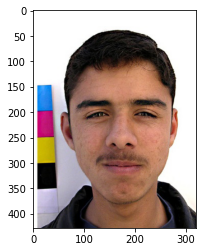

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/split/test/without_mask/129.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Without Mask"
else:
    prediction ="With Mask"
print('Prediction: ',prediction)

img=mpimg.imread('/content/split/test/without_mask/129.jpg')
imgplot = plt.imshow(img)
plt.show()